<a href="https://colab.research.google.com/github/RafaelPersano/Flowisetutorial/blob/main/investimentoimobiliarioipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Informe o valor do imóvel (em R$): 500000
Informe o percentual de entrada (em %): 10
Informe o percentual de financiamento (em %): 70
Informe o INCC anual (em %): 6
Informe o número de meses para entrega do imóvel: 30
Informe o percentual de valorização anual do imóvel (em %): 14
Informe o número de meses para vender o imóvel após o início da obra: 21
Informe o percentual de imposto sobre o lucro da venda (em %): 20
Informe o percentual de corretagem na venda (em %): 6
Informe o percentual de custo com reformas (em %): 2
Informe o percentual de retorno anual da renda fixa (em %): 11

Resumo do cálculo (Normas Contábeis):
Valor do imóvel: R$ 500,000.00
Entrada (aporte inicial): R$ 50,000.00
Saldo devedor corrigido (com INCC até venda): R$ 451,374.68
Preço de venda do imóvel: R$ 637,905.37
Custos com corretagem: R$ 38,274.32
Custo com reformas: R$ 10,000.00
Imposto sobre lucro: R$ 27,651.27
Lucro líquido da venda: R$ 110,605.09
ROI da venda: 221.21%
Valor acumulado na renda fixa: R$ 79,6

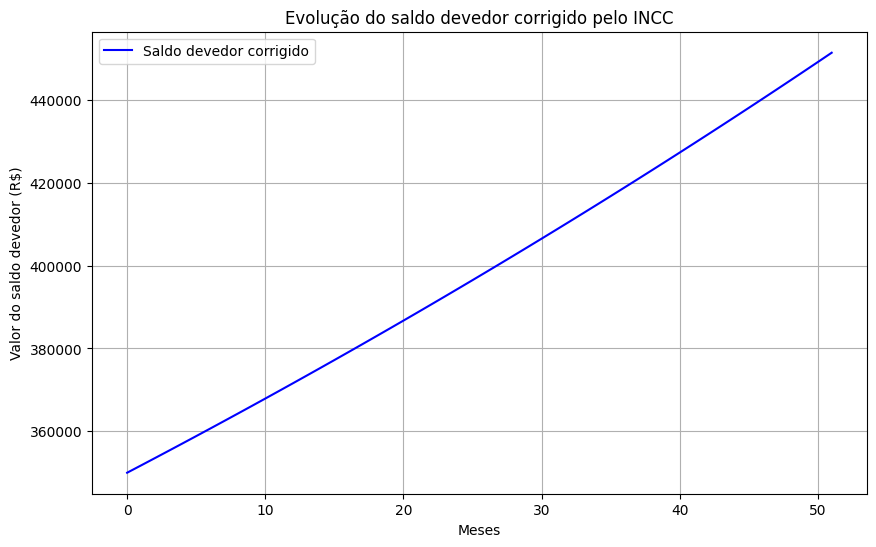

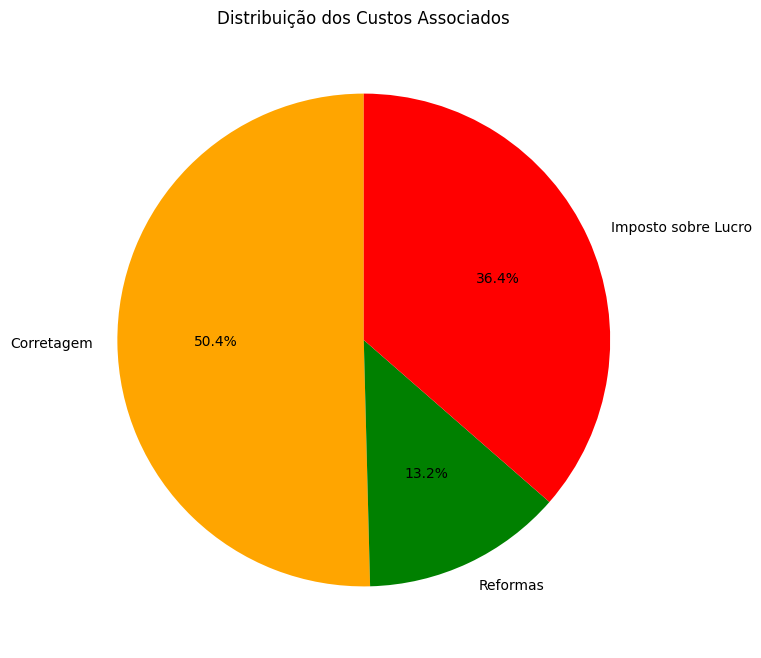

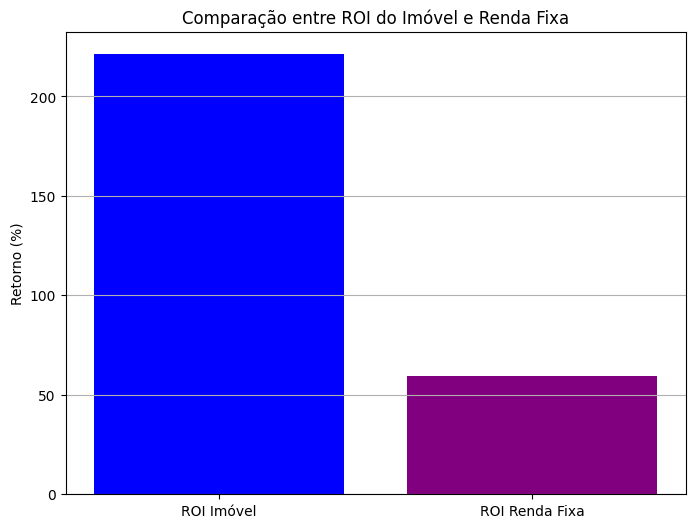

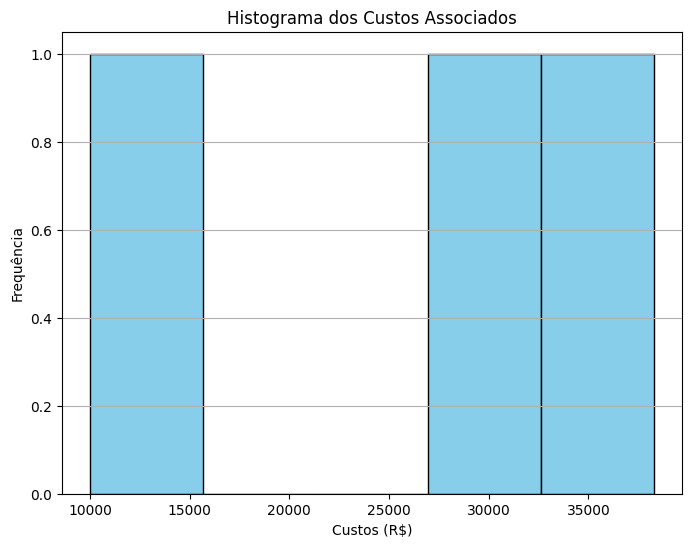

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Entrada de dados
valor_imovel = float(input("Informe o valor do imóvel (em R$): "))
percentual_entrada = float(input("Informe o percentual de entrada (em %): ")) / 100
percentual_financiamento = float(input("Informe o percentual de financiamento (em %): ")) / 100
incc_anual = float(input("Informe o INCC anual (em %): ")) / 100
meses_entrega = int(input("Informe o número de meses para entrega do imóvel: "))
valorizacao_anual = float(input("Informe o percentual de valorização anual do imóvel (em %): ")) / 100
meses_venda = int(input("Informe o número de meses para vender o imóvel após o início da obra: "))
percentual_imposto = float(input("Informe o percentual de imposto sobre o lucro da venda (em %): ")) / 100
percentual_corretagem = float(input("Informe o percentual de corretagem na venda (em %): ")) / 100
percentual_reformas = float(input("Informe o percentual de custo com reformas (em %): ")) / 100
renda_fixa_anual = float(input("Informe o percentual de retorno anual da renda fixa (em %): ")) / 100

# Cálculos detalhados
entrada = valor_imovel * percentual_entrada
saldo_devedor_inicial = valor_imovel * percentual_financiamento

# Correção mensal do saldo devedor pelo INCC até o período de venda
saldo_devedor_mensal = [saldo_devedor_inicial]
for mes in range(1, meses_entrega + meses_venda + 1):
    saldo_corrigido = saldo_devedor_mensal[-1] * (1 + incc_anual / 12)
    saldo_devedor_mensal.append(saldo_corrigido)

# Valorização do imóvel até o momento da venda
preco_venda = valor_imovel * (1 + valorizacao_anual / 12) ** meses_venda

# Custos associados à venda
corretagem = preco_venda * percentual_corretagem
custo_reformas = valor_imovel * percentual_reformas

# Cálculo do lucro bruto
lucro_bruto = preco_venda - saldo_devedor_mensal[-1] - corretagem - custo_reformas

# Imposto sobre o lucro (apenas se o lucro for positivo)
imposto_lucro = lucro_bruto * percentual_imposto if lucro_bruto > 0 else 0

# Cálculo do lucro líquido
lucro_liquido = lucro_bruto - imposto_lucro

# ROI
roi = (lucro_liquido / entrada) * 100 if entrada > 0 else 0

# Comparação com investimento em renda fixa
valor_renda_fixa = entrada * (1 + renda_fixa_anual / 12) ** (meses_entrega + meses_venda)
roi_renda_fixa = ((valor_renda_fixa - entrada) / entrada) * 100

# Resultados
print("\nResumo do cálculo (Normas Contábeis):")
print(f"Valor do imóvel: R$ {valor_imovel:,.2f}")
print(f"Entrada (aporte inicial): R$ {entrada:,.2f}")
print(f"Saldo devedor corrigido (com INCC até venda): R$ {saldo_devedor_mensal[-1]:,.2f}")
print(f"Preço de venda do imóvel: R$ {preco_venda:,.2f}")
print(f"Custos com corretagem: R$ {corretagem:,.2f}")
print(f"Custo com reformas: R$ {custo_reformas:,.2f}")
print(f"Imposto sobre lucro: R$ {imposto_lucro:,.2f}")
print(f"Lucro líquido da venda: R$ {lucro_liquido:,.2f}")
print(f"ROI da venda: {roi:.2f}%")
print(f"Valor acumulado na renda fixa: R$ {valor_renda_fixa:,.2f}")
print(f"ROI da renda fixa: {roi_renda_fixa:.2f}%")

# Gráfico 1: Evolução do saldo devedor corrigido mês a mês
meses = np.arange(0, meses_entrega + meses_venda + 1)
plt.figure(figsize=(10, 6))
plt.plot(meses, saldo_devedor_mensal, label="Saldo devedor corrigido", color='blue')
plt.title("Evolução do saldo devedor corrigido pelo INCC")
plt.xlabel("Meses")
plt.ylabel("Valor do saldo devedor (R$)")
plt.grid()
plt.legend()
plt.show()

# Gráfico 2: Pizza com os custos associados
custos = [corretagem, custo_reformas, imposto_lucro]
labels = ['Corretagem', 'Reformas', 'Imposto sobre Lucro']
plt.figure(figsize=(8, 8))
plt.pie(custos, labels=labels, autopct='%1.1f%%', startangle=90, colors=['orange', 'green', 'red'])
plt.title("Distribuição dos Custos Associados")
plt.show()

# Gráfico 3: Comparação entre ROI da venda e renda fixa
rois = [roi, roi_renda_fixa]
labels = ['ROI Imóvel', 'ROI Renda Fixa']
plt.figure(figsize=(8, 6))
plt.bar(labels, rois, color=['blue', 'purple'])
plt.title("Comparação entre ROI do Imóvel e Renda Fixa")
plt.ylabel("Retorno (%)")
plt.grid(axis='y')
plt.show()

# Gráfico 4: Histograma dos custos
custos_totais = [corretagem, custo_reformas, imposto_lucro]
plt.figure(figsize=(8, 6))
plt.hist(custos_totais, bins=5, color='skyblue', edgecolor='black')
plt.title("Histograma dos Custos Associados")
plt.xlabel("Custos (R$)")
plt.ylabel("Frequência")
plt.grid(axis='y')
plt.show()
